In [1]:
import numpy as np
import sklearn.metrics as metrics
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
def get_y_estimate(conf_mat): # estimate a y_pred, y_true array that would create the corresponding confusion matrix. Used for confidence estimation
    y_pred = []
    y_true = []
    t = 0
    for line in conf_mat:
        p = 0
        for val in line:
            for i in range(val):
                y_true.append(t) # the current true label
                y_pred.append(p)
            p += 1
        t += 1
    
    return (y_true, y_pred)




In [23]:
matr = np.load("../py/weights/NINA_confusion_matrix_30.npy")
y_true, y_pred = get_y_estimate(matr)
kappa = np.round(metrics.cohen_kappa_score(y_true, y_pred), 3)
acc = np.round(metrics.accuracy_score(y_true, y_pred), 3)
prec = np.round(metrics.precision_score(y_true, y_pred, average='micro'), 3)
recall = np.round(metrics.recall_score(y_true, y_pred, average='micro'), 3)
f1 = np.round(metrics.f1_score(y_true, y_pred, average='micro'), 3)


print(acc, prec, recall, f1, kappa)

0.934 0.934 0.934 0.934 0.909


In [24]:
def cohen_kappa_score(conf_matrix):
    n_classes = conf_matrix.shape[0]
    
    # Calculate observed accuracy (Po)
    Po = np.trace(conf_matrix) / conf_matrix.sum()
    
    # Calculate expected accuracy (Pe)
    Pe = sum((conf_matrix.sum(axis=0)[i] * conf_matrix.sum(axis=1)[i]) for i in range(n_classes)) / (conf_matrix.sum() ** 2)
    
    # Calculate Cohen's Kappa score (k)
    k = (Po - Pe) / (1 - Pe)
    
    return k

def model_evaluation(conf_mat):
     TP = np.diag(conf_mat)
     FP = conf_mat.sum(axis=0) - TP
     FN = conf_mat.sum(axis=1) - TP
     TN = conf_mat.sum() - (FP + FN + TP)

     accuracy = np.round((TP+TN)/(TP+FP+FN+TN), 3)
     precision = np.round(TP/(TP+FP), 3)
     recall = np.round(TP/(TP+FN), 3)
     f1 = np.round(2 * precision*recall/(precision+recall), 3)
     kappa = np.round(cohen_kappa_score(conf_mat), 3)

     micro_accuracy = np.round(np.sum(np.diag(conf_mat))/np.sum(conf_mat), 3)
     micro_precision = np.round(np.sum(TP) / np.sum(TP + FP), 3)
     micro_recall = np.round(np.sum(TP) / np.sum(TP + FN), 3)
     micro_fpr = np.round(np.sum(FP) / np.sum(FP + TN), 3)
     micro_fnr = np.round(np.sum(FN) / np.sum(FN + TP), 3)
     micro_f1_score = np.round(2*np.sum(TP) / (2*np.sum(TP) + np.sum(FP + FN)), 3)

     print("Global stats:")
     s = ("| " + "Accuracy".ljust(9) + " | " + "Precision".ljust(9) + " | " + "Recall".ljust(9) + 
          " | " + "f1-Score".ljust(9) +  " | " + "FPR".ljust(9) + " | " + "FNR".ljust(9) + " | " + "Kappa".ljust(9) + " |")
     print(s)
     s = ("| " + str(micro_accuracy).ljust(9) + " | " + str(micro_precision).ljust(9) + " | " + str(micro_recall).ljust(9) + " | " + 
          str(micro_f1_score).ljust(9) + " | " + str(micro_fpr).ljust(9) + " | " + str(micro_fnr).ljust(9) + " | " + str(kappa).ljust(9) + " |")
     print(s)

In [25]:
# def model_evaluation(conf_mat):
#     TP = np.diag(conf_mat)
#     FP = conf_mat.sum(axis=0) - TP
#     FN = conf_mat.sum(axis=1) - TP
#     TN = conf_mat.sum() - (FP + FN + TP)

#     accuracy = np.round((TP+TN)/(TP+FP+FN+TN), 3)
#     precision = np.round(TP/(TP+FP), 3)
#     recall = np.round(TP/(TP+FN), 3)
#     f1 = np.round(2 * precision*recall/(precision+recall), 3)
#     kappa = np.round(cohen_kappa_score(conf_mat), 3)

#     micro_accuracy = np.round(np.sum(np.diag(conf_mat))/np.sum(conf_mat), 3)
#     micro_precision = np.round(np.sum(TP) / np.sum(TP + FP), 3)
#     micro_recall = np.round(np.sum(TP) / np.sum(TP + FN), 3)
#     micro_fpr = np.round(np.sum(FP) / np.sum(FP + TN), 3)
#     micro_fnr = np.round(np.sum(FN) / np.sum(FN + TP), 3)
#     micro_f1_score = np.round(2*np.sum(TP) / (2*np.sum(TP) + np.sum(FP + FN)), 3)

#     return kappa
    
#     print("Global stats:")
#     s = ("| " + "Accuracy".ljust(9) + " | " + "Precision".ljust(9) + " | " + "Recall".ljust(9) + 
#         " | " + "f1-Score".ljust(9) +  " | " + "FPR".ljust(9) + " | " + "FNR".ljust(9) + " | " + "Kappa".ljust(9) + " |")
#     print(s)
#     s = ("| " + str(micro_accuracy).ljust(9) + " | " + str(micro_precision).ljust(9) + " | " + str(micro_recall).ljust(9) + " | " + 
#         str(micro_f1_score).ljust(9) + " | " + str(micro_fpr).ljust(9) + " | " + str(micro_fnr).ljust(9) + " | " + str(kappa).ljust(9) + " |")
#     print(s)

In [26]:
def extract_number(filename):
    # Extract the number at the end of the filename using regular expressions
    filename = filename.split(".")[0]
    num = int(filename.split("_")[3])
    return num


In [27]:
files = os.listdir("../py/weights/")
new_files = []
for file in files:
    if ("NINA_confusion_matrix" in file):
        new_files.append(file)


sorted_files = sorted(new_files, key=extract_number)

best_kappa = 0
best_run = ""
for file in sorted_files:
    matr = np.load(f"../py/weights/{file}")
    if(len(matr.shape) > 2):
        matr = np.mean(matr, axis=2)
    k = cohen_kappa_score(matr)
    if(k > best_kappa):
        best_run = file
        best_kappa = k

In [28]:
best_run

'NINA_confusion_matrix_9.npy'

In [30]:
matr = np.load("../py/weights/NINA_confusion_matrix_21.npy")
print(matr.shape)
print(matr)
print(np.sum(matr))
model_evaluation(matr)
print(np.round(np.sum(np.diag(matr))/np.sum(matr), 3))

(12, 12)
[[1955   69   75   26   13    1    1   74    0    0    4    0]
 [ 173 7685   77  109   19   10   22  160    5    2    8    1]
 [  56   23 2146   34    7    5    3   66    0    0    3    0]
 [   6    9   18  858    0    4    1   55    0    0    0    0]
 [  15   20    2    3  342    0    1    5    0    0    4    1]
 [   7    3    1    3    2  127    0   10    0    1    0    0]
 [   2   10    0    4    0    0  462    3    0    0    1    0]
 [  30   33   58  140    4    5    0 1744    0    1    4    0]
 [   0    4    0    1    0    0    0    0   32    0    0    0]
 [   0    3    1    0    0    0    0    1    0   31    0    0]
 [   9    7    2    3    3    0    0    2    0    0  119    2]
 [   1    2    1    0    0    0    0    0    2    0    0    7]]
17064
Global stats:
| Accuracy  | Precision | Recall    | f1-Score  | FPR       | FNR       | Kappa     |
| 0.909     | 0.909     | 0.909     | 0.909     | 0.008     | 0.091     | 0.873     |
0.909


In [8]:
files = os.listdir("../py/weights/")
new_files = []
for file in files:
    if ("NINA_confusion_matrix" in file):
        new_files.append(file)


sorted_files = sorted(new_files, key=extract_number)

best_kappa = 0
best_run = ""
for file in sorted_files:
    matr = np.load(f"../py/weights/{file}")
    if(len(matr.shape) > 2):
        matr = np.mean(matr, axis=2)
    print(file)
    print(matr.shape)
    print(np.sum(matr))
    model_evaluation(matr)
    print("="*120)

NINA_confusion_matrix_1.npy
(32, 32)
32095
Global stats:
| Accuracy  | Precision | Recall    | f1-Score  | FPR       | FNR       | Kappa     |
| 0.98      | 0.98      | 0.98      | 0.98      | 0.001     | 0.02      | 0.976     |
NINA_confusion_matrix_2.npy
(32, 32)
32095
Global stats:
| Accuracy  | Precision | Recall    | f1-Score  | FPR       | FNR       | Kappa     |
| 0.979     | 0.979     | 0.979     | 0.979     | 0.001     | 0.021     | 0.975     |
NINA_confusion_matrix_3.npy
(32, 32)
9626
Global stats:
| Accuracy  | Precision | Recall    | f1-Score  | FPR       | FNR       | Kappa     |
| 0.97      | 0.97      | 0.97      | 0.97      | 0.001     | 0.03      | 0.964     |
NINA_confusion_matrix_4.npy
(32, 32)
9626
Global stats:
| Accuracy  | Precision | Recall    | f1-Score  | FPR       | FNR       | Kappa     |
| 0.963     | 0.963     | 0.963     | 0.963     | 0.001     | 0.037     | 0.955     |
NINA_confusion_matrix_5.npy
(32, 32)
32095
Global stats:
| Accuracy  | Precision | Rec

/tmp/ipykernel_204093/2485227196.py:22: RuntimeWarning: invalid value encountered in divide
  precision = np.round(TP/(TP+FP), 3)


In [9]:
classes = np.arange(matr.shape[0])

# initialize the vectors
y_true = []
y_pred = []

# for each class
for i, class_i in enumerate(classes):
    # for each other class
    for j, class_j in enumerate(classes):
        # append the true class and the predicted class the number of times this prediction was made
        y_true += [class_i] * matr[i, j]
        y_pred += [class_j] * matr[i, j]

# convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [10]:
acc = metrics.accuracy_score(y_true, y_pred)
prec = metrics.precision_score(y_true, y_pred, average="micro")
rec = metrics.recall_score(y_true, y_pred, average="micro")
print(acc, prec, rec)

0.9654109589041096 0.9654109589041096 0.9654109589041096


In [13]:
files = os.listdir("../py/Metadata_only/")

In [19]:
weights = []
evaluations = []
confusion_matrix = []
for file in files:
    if("weights" in file):
        weights.append(file)
    if("evaluation" in file):
        evaluations.append(file)
    if("confusion_matrix" in file):
        confusion_matrix.append(file)

In [22]:
def extract_number(filename):
    # Extract the number at the end of the filename using regular expressions
    filename = filename.split(".")[0]
    num = int(filename.split("_")[-1])
    return num

weights = sorted(weights, key=extract_number)
evaluations = sorted(evaluations, key=extract_number)
confusion_matrix = sorted(confusion_matrix, key=extract_number)

In [76]:
kappas = []
accuracies = []
for i in range(8):
    kappas.append([])
    accuracies.append([])

for file in confusion_matrix:
    mat = np.load(f"../py/Metadata_only/{file}")
    k = np.round(cohen_kappa_score(mat), 3)
    acc = np.sum(np.diag(mat))/(np.sum(mat))
    kappas[mat.shape[0]-2].append(k)
    accuracies[mat.shape[0]-2].append(acc)

for i in range(8):
    kappas[i] = np.mean(kappas[i])
    accuracies[i] = np.mean(accuracies[i])

print(kappas,"\n", accuracies)

[0.34098888888888884, 0.2365514764565044, 0.17397037037037036, 0.1247813829787234, 0.06421507936507936, 0.02668105065666041, 0.007637037037037037, -0.0002142857142857143] 
 [0.5675281640448967, 0.41092928360680014, 0.30533527952411027, 0.23392789008289352, 0.1565807679987837, 0.1181670525411961, 0.10347426533153341, 0.11112561256967717]


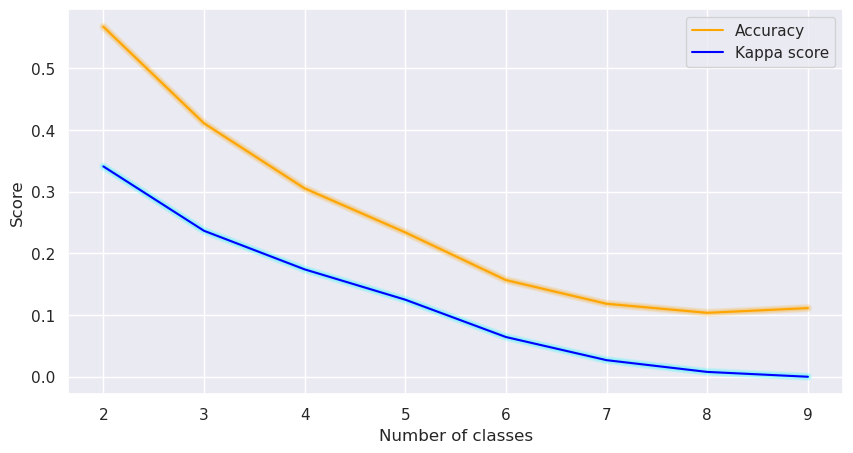

In [79]:
plt.figure(figsize=(10, 5))
for i in range(1, 7):
    plt.plot(np.arange(2, 10), accuracies, linewidth=i, alpha=0.1, c="orange", antialiased=True)
    plt.plot(np.arange(2, 10), kappas, linewidth=i, alpha=0.1, c="cyan", antialiased=True)
plt.plot(np.arange(2, 10), accuracies, c="orange", antialiased=True, label="Accuracy")
plt.plot(np.arange(2, 10), kappas, c="blue", antialiased=True, label="Kappa score")


plt.xlabel("Number of classes")
plt.ylabel("Score")
plt.legend()

plt.savefig("../../Report_v2/images/Chapter4/metadata_prediction_vs_classes.png", dpi=300)
plt.show()